## Multiple Layer Perceptron Hands-on using `IRIS Dataset`

### Import certain libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier #scikit library
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Step #1 Load the IRIS dataset

##### `Input Layer` --> `ONE Hidden Layer` --> `Output Layer`

In [2]:
from sklearn.datasets import load_iris

In [3]:
### Load the iris dataset
iris = load_iris()

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
df_iris = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target


In [9]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df_iris['target'].unique()

array([0, 1, 2])

### `INPUT LAYER` ---> ` (1) HIDDEN LAYER` ---> `OUTPUT LAYER`

In [15]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs = 100):
        self.input_size = input_size #no. of input features or variables in the input layer
        self.hidden_size = hidden_size #no. of neurons in the hidden layer
        self.output_size = output_size #no. of neurons in the output layer
        self.learning_rate = learning_rate #learning rate for the gradient descent step
        self.epochs = epochs #no. of training_epochs
        
        ###############################
        # INPUT LAYER TO HIDDEN LAYER
        ###############################
        self.W1 = np.random.randn(self.input_size, self.hidden_size)*0.01 # random weights from input to hidden layer
        self.b1 = np.zeros((1, self.hidden_size)) #bias for the hidden layer
        
        ###############################
        # HIDDEN LAYER TO OUTPUT LAYER
        ###############################
        self.W2 = np.random.randn(self.hidden_size, self.output_size)*0.01 # random weights from hidden layer to output layer
        self.b2 = np.zeros((1, self.output_size)) #bias for the output layer
        
        ### Loss history for plotting
        self.loss_history = [] #empty list initialized to store the loss values during training epochs
        ### Accuracy history for plotting
        self.accuracy_history = [] #empty list initialized to store the accuracy values during training epochs
        
    ## ReLU activation functions
    def relu (self, z):
        return np.maximum(0,z)
    
    ## Derivative of ReLU for backpropagation
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0)
    
    ## Softmax for multi-class classification
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z, axis=1, keepdims = True)) #subtract max for numerical stability
        return exp_values / np.sum(exp_values, axis = 1, keepdims= True)
    

     ######################
    # FORWARD PROPAGATION #
    ######################
    
    
    def forward(self, X):
        
        ###############################
        # INPUT LAYER TO HIDDEN LAYER
        ###############################
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1) # computes the activation function in the hidden layer using ReLU (Rectified Linear Unit)
        
         ###############################
        # HIDDEN LAYER TO OUTPUT LAYER
        ###############################
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2) #computes the probabilities using softmax for multi-class classification
        
        return self.probs
    
    ### cross-entropy loss for multi-class classification
    def compute_loss(self,y_true, probs):
        loss = -np.mean(np.sum(y_true * np.log(probs), axis=1))
        return loss
    
    ### compute accuracy
    def compute_accuracy(self, y_true, probs):
        predictions = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_true, axis=1)
        return np.mean(predictions == true_labels)
    
    ########################
    # BACKWARD PROPAGATION #
    #######################
    
    def backward(self, X, y):
        # Number of rows/records/training examples
        m = X.shape[0]
        
        #Gradients of the loss w.r.t. weights and biases of the OUTPUT LAYER
        delta3 = self.probs - y # 
        dW2 = np.dot(self.a1.T, delta3)/m  # gradient (batch) of the loss w.r.t weights of the output layer (dW2)
        db2 = np.sum(delta3, axis=0, keepdims=True) / m #Gradient of the loss w.r.t bias of the output layer (db2)
        
        #Gradients of the loss w.r.t. weights and biases of the HIDDEN LAYER
        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1) # used derivative of ReLU
        dW1 = np.dot(X.T, delta2)/m  # gradient (batch) of the loss w.r.t weights of the hidden layer (dW1)
        db1 = np.sum(delta2, axis=0, keepdims=True) / m #Gradient of the loss w.r.t bias of the hidden layer (db1)
        
        
        ### Update the parameters - weights and biases across the layers
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        
        
        
    def train(self, X, y):
        for epoch in range(self.epochs):
            
            ### Forward Pass
            probs = self.forward(X) # computes the predictions using forward pass
            
            ### Compute the categorical cross-entropy loss
            loss = self.compute_loss(y, probs)
            accuracy = self.compute_accuracy(y, probs)
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)
            
            ### Backward pass (Backpropagation)
            self.backward(X,y)
            
            ### Print the progress after every 10 epochs
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
            
    
    def test(self, X_test, y_test):
        
        probs = self.forward(X_test)
        loss = self.compute_loss(y_test, probs)
        accuracy = self.compute_accuracy(y_test, probs)
        
        print(f'Test Loss: {loss:.4f}, Test_Accuracy: {accuracy:.4f}')
        return loss, accuracy

In [13]:
import os
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\04. AI and DL IITR-17Nov2024'

### Initialize the network for `IRIS` dataset

In [14]:
input_size = 4 # number of input features (from IRIS dataset)
hidden_size = 8 # number of neurons in the hidden layer
output_size = 3 # number of classes (setosa, versicolor, virginica)

In [31]:
### Fire the very much our own NN --> MLP
nn = NeuralNetwork(input_size, hidden_size, output_size, epochs=500, learning_rate=0.03) #creating the NN object

In [32]:
nn

### Training

In [21]:
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
y = iris.target

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### One hot encoding

In [24]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1,1))

C:\Users\think\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [33]:
### Split the IRIS dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(120, 4)

In [35]:
X_test.shape

(30, 4)

In [36]:
30/150*100

20.0

In [37]:
### Train the NN on the training set
nn.train(X_train, y_train) # make the NN model to learn input and output (supervised learning)

Epoch 0, Loss: 1.0986, Accuracy: 0.3250
Epoch 10, Loss: 1.0983, Accuracy: 0.3417
Epoch 20, Loss: 1.0980, Accuracy: 0.3417
Epoch 30, Loss: 1.0974, Accuracy: 0.3417
Epoch 40, Loss: 1.0965, Accuracy: 0.3417
Epoch 50, Loss: 1.0948, Accuracy: 0.3417
Epoch 60, Loss: 1.0918, Accuracy: 0.5833
Epoch 70, Loss: 1.0866, Accuracy: 0.3583
Epoch 80, Loss: 1.0778, Accuracy: 0.3250
Epoch 90, Loss: 1.0642, Accuracy: 0.3250
Epoch 100, Loss: 1.0448, Accuracy: 0.3250
Epoch 110, Loss: 1.0186, Accuracy: 0.3333
Epoch 120, Loss: 0.9836, Accuracy: 0.6000
Epoch 130, Loss: 0.9387, Accuracy: 0.6583
Epoch 140, Loss: 0.8913, Accuracy: 0.6583
Epoch 150, Loss: 0.8428, Accuracy: 0.6583
Epoch 160, Loss: 0.7921, Accuracy: 0.6583
Epoch 170, Loss: 0.7386, Accuracy: 0.6583
Epoch 180, Loss: 0.6853, Accuracy: 0.6667
Epoch 190, Loss: 0.6362, Accuracy: 0.6750
Epoch 200, Loss: 0.5938, Accuracy: 0.6917
Epoch 210, Loss: 0.5582, Accuracy: 0.7083
Epoch 220, Loss: 0.5285, Accuracy: 0.7833
Epoch 230, Loss: 0.5035, Accuracy: 0.8583
Epo

### Let us do some plotting

`Loss vs Epochs` | `Accuracy vs Epochs`

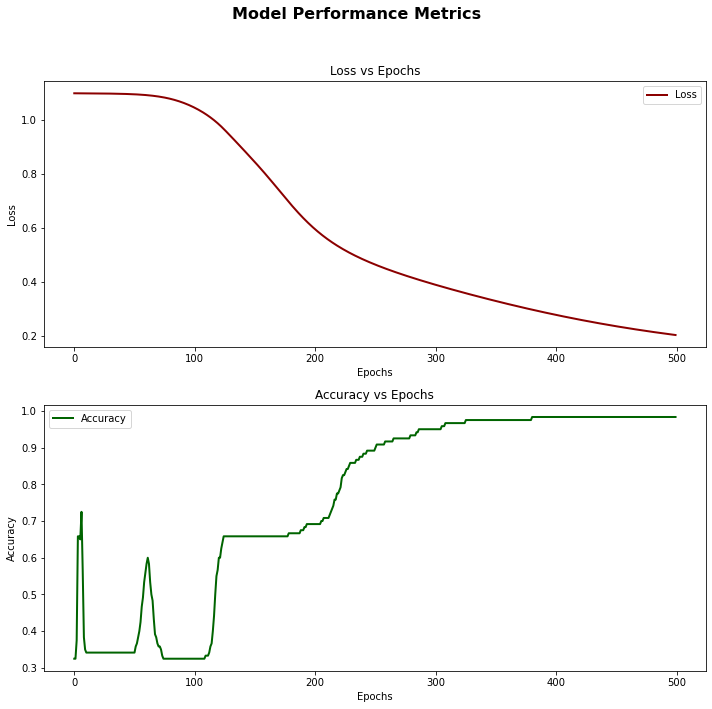

In [42]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

### Plot the loss by epoch
ax[0].plot(nn.loss_history, label='Loss', color='darkred', linewidth=2)
ax[0].set_title('Loss vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()


### Plot the accuracy by epoch
ax[1].plot(nn.accuracy_history, label='Accuracy', color='darkgreen', linewidth=2)
ax[1].set_title('Accuracy vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

### Add a super title
plt.suptitle('Model Performance Metrics', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the super title

plt.show()